<img style="float: right; margin: 0px 0px 15px 15px;" src="https://www.bbva.com/wp-content/uploads/2016/08/Fondos-Estrategia-BBVA-Bancomer-portada.-e1485335541719.jpg" width="500px" height="300px" />


#                  Proyecto
> ### <font color=blue> Problema de inversión resuelto con programación lineal y ajuste de curva del precio cierre del dólar
# <font color=red>Título: Rentabilidad de una inversión
   
#### Integrantes:
1. Ivette Landaverde Mercado
2. Miguel Moreno Morrill
3. Diego Echeverria Villaseñor

### Objetivo: 
Poder resolver un problema de inversiones teniendo dos opciones distintas de activos y otras restricciones como la cantidad máxima a invertir en un cierto activo y el número de acciones permitido utilizando programación lineal y matrices.
### Objetivo especifíco:
En este problema se busca maximizar los ingresos del inversionista y modelar las restricciones dadas con funciones.

## <font color=red>Problema: 


#### <font color=green> Un asesor financiero ha recomendado a su cliente, invertir en dos activos; el activo A y el activo B con su capital de 500 millones de pesos. Un millón de pesos invertido en el activo A da una utilidad de 500 mientras que un millón de pesos invertido en el activo B da 1000 pesos de utilidad. Sin embargo, por decisión del inversionista, no se pueden invertir más de 200 millones en el activo A, ya que prefiere correr riesgos pero tener la posibilidad de ganar más utilidades. Otro dato a considerar es que se dispone de un volumen de 120,000 acciones, considerando que un millón de pesos invertido en el activo A requiere de 250 acciones y un millón de pesos invertido en el activo B requiere de 550 acciones. El cliente le indica a su corredor que modele las opciones para determinar cuántos millones le conviene invertir en cada activo para maximizar sus ingresos.

##  <font color=red>Solución:

### Variables: 

$X$ = Millones de pesos a invertir en A.

$Y$ = Millones de pesos a invertir en B.

### <font color=green> Las variables son prácticamente la respuesta a la función a optimizar y ya que estamos hablando de optimizar ingresos, entonces son los millones de pesos a invertir en cada acción porque de eso dependen las utilidades obtenidas.

### Función a optimizar:
$500A + 1000B$

### Restricciones:
1. Millones con los que cuenta para invertir: $A + B \leq 500$

2. Límite de millones a inverir en : $ A \leq 200$

3. Número de acciones disponibles: $250A + 550B \leq 120000$


### <font color=green> En las restricciones se toma en cuenta tanto como que el máximo de millones a invertir es de 500  hasta que el cliente no quiere más de 200 millones invertidos en el activo A porque no es conservador y prefiere correr riesgos y que el máximo de acciones es de 120000 (el activo A usa 250 por millón y el b 550).

In [1]:
import scipy.optimize as opt
import numpy as np

In [22]:
#escribir las matrices:
c = -np.array([500,1000])
F = np.array([[1,1],
              [1,0],
              [250,550]])
d = np.array([500,200,120000])

### <font color=green> Utilizamos un signo negativo antes de la matriz c porque se buscan optimizar los ingresos. La matriz c es formada con la función objetivo, la F con las restricciones y la d con los resultados de las restricciones.

In [23]:
sol = opt.linprog(c,A_ub=F,b_ub=d)
sol

     con: array([], dtype=float64)
     fun: -227272.72717672493
 message: 'Optimization terminated successfully.'
     nit: 5
   slack: array([1.72727273e+02, 8.49261141e-08, 5.06781507e-05])
  status: 0
 success: True
       x: array([199.99999992, 127.27272722])

### <font color=red>Conclusión:

### <font color=green>El ingreso máximo a obtener (de utilidades) es de $227,272$ y se obtiene invirtiendo $199.999999$ millones en el activo A y $127.272727$ en el activo B. Por lo que esto es lo que el asesor financiero debería aconsejar al cliente hacer.

### Se pudo resolver un problema de inverión con dos opciones y ciertas restricciones utilizando programación lineal en python lo cual facilitó el trabajo y optimizó el tiempo además de que los resultados son muy precisos.

## Ejercicio 2: 
# <font color=red>Título: Ajuste de curva del precio dólar

### Objetivo: 
Con una lista de datos previamente descargada hacer un ajuste de curva minimizando el error cuadrático para hacer la mejor aproximación posible.
### Objetivo especifíco:
En este problema se busca encontrar un modelo que se ajuste a la variación de precios del dólar en el último año para evaluar si tiene alguna relación el como se comporta ahora con como se comportó en el pasado.

### Problema: 
<font color=blue>Descargar de Yahoo finance el historial del precio del dólar en el último año (de cierre), graficar los datos y con eso proponer distintos polinomios que se ajusten a su comportamiento, la idea es poder deducir un poco que interviene en el precio del dólar.

In [4]:
#primero importamos las librerías a utulizar 
import sympy as sym
import numpy as np
import scipy.optimize as opt
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
#llamamos el archivo, mismo que se encuentra en la misma carpeta en la que estamos trabajando
archivo = 'MXNX.csv'
data = pd.read_csv(archivo)
data

,Consecutivo,Date,Adj Close
0,1,11/03/2019,19.483200
1,2,12/03/2019,19.391300
2,3,13/03/2019,19.330400
3,4,14/03/2019,19.290100
4,5,15/03/2019,19.298599
...,...,...,...
257,258,04/03/2020,19.431601
258,259,05/03/2020,19.517200
259,260,06/03/2020,19.814501
260,261,09/03/2020,21.057501


In [6]:
#nombramos las variables a utilizar conforme a su posición, nos interesa el consecutivo y el precio de cierre:
x = data.iloc[:,0]
y = data.iloc[:,2]

In [7]:
#creamos la función
def obj(beta,x,y,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [8]:
#proponemos 3 polinomios para los datos
beta_01 = np.zeros(2)
sol1 = opt.minimize(obj,beta_01,args=(x,y,1))
beta_02 = np.zeros(3)
sol2 = opt.minimize(obj,beta_02,args=(x,y,2))
beta_03 = np.zeros(4)
sol3 = opt.minimize(obj,beta_03,args=(x,y,3))

In [24]:
sol1

      fun: 34.52238529182577
 hess_inv: array([[ 7.67005222e-03, -4.38000042e-05],
       [-4.38000042e-05,  3.33209611e-07]])
      jac: array([-0.00051212, -0.04226398])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 292
      nit: 3
     njev: 70
   status: 2
  success: False
        x: array([ 1.92353963e+01, -2.64834455e-04])

In [25]:
sol2

      fun: 30.389493253315514
 hess_inv: array([[ 1.75869781e-02, -2.67853116e-04,  8.50174520e-07],
       [-2.67853116e-04,  5.41465224e-06, -1.93058393e-08],
       [ 8.50174520e-07, -1.93058393e-08,  7.33755068e-11]])
      jac: array([-0.0001061 , -0.0449512 ,  0.00024748])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 392
      nit: 6
     njev: 76
   status: 2
  success: False
        x: array([ 1.89480794e+01,  6.26303991e-03, -2.48186845e-05])

In [26]:
sol3

      fun: 302.6813341858832
 hess_inv: array([[ 3.14994546e-02, -8.99915276e-04,  6.85602974e-06,
        -1.52348402e-08],
       [-8.99915276e-04,  3.40943501e-05, -2.91626984e-07,
         6.90480041e-10],
       [ 6.85602974e-06, -2.91626984e-07,  2.65810174e-09,
        -6.55202992e-12],
       [-1.52348402e-08,  6.90480041e-10, -6.55202992e-12,
         1.66061689e-14]])
      jac: array([-7.14874268e-03,  1.11739349e+00,  6.75223694e+01, -1.37485504e-01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 642
      nit: 6
     njev: 105
   status: 2
  success: False
        x: array([ 2.16089253e+01, -1.14436472e-01,  1.12093770e-03, -2.90453976e-06])

<font color=red>Podemos observar que según el error cuadrático el polinomio de grado 2 es el que mejor se ajusta a los datos, aunque su error sigue siendo de más de 30 lo cual es muy significativo. 
También podemos observar que no hay mucha diferencia del polinomio gardo 1 y el grado 2 pero si más diferencia con el de grado 3 por lo que ya no propusimos polinomios de grado mayor.<font>

In [11]:
x_p = x
y_p = y

yhat1 = (sol1.x[0] + sol1.x[1]*x_p)
yhat2 = (sol2.x[0] + sol2.x[1]*x_p + sol2.x[2]*(x_p**2))
yhat3 = (sol3.x[0] + sol3.x[1]*x_p + sol3.x[2]*(x_p**2) + sol3.x[3]*(x_p**3))

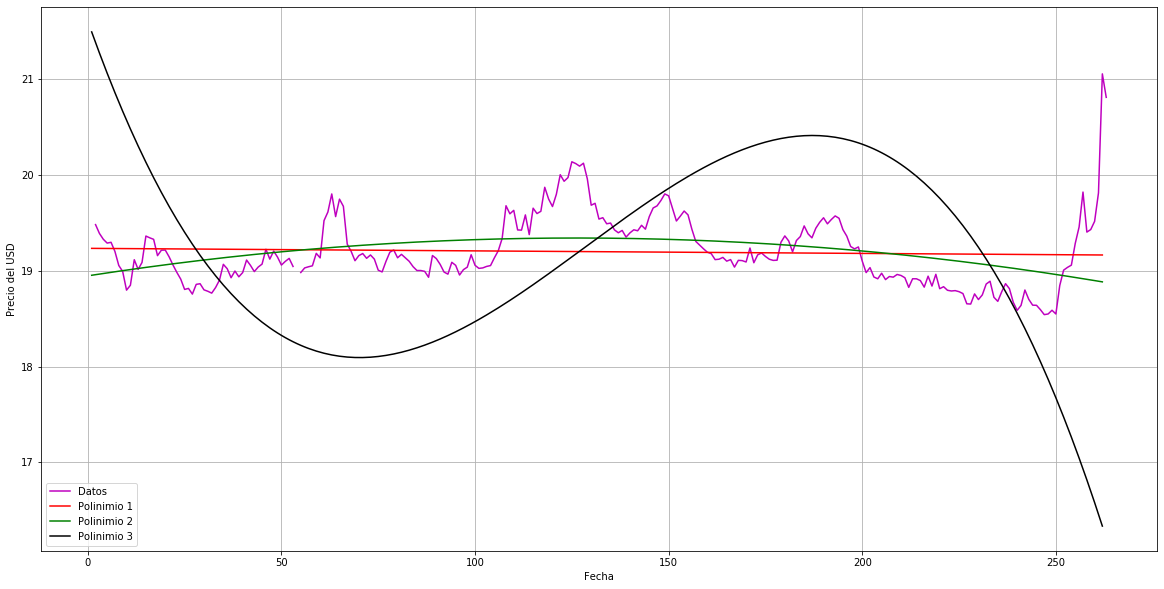

In [12]:
#Graficamos los datos y los modelos
plt.figure(figsize=(20,10))
plt.plot(x_p+1, y_p,'m',ms=30, label='Datos')
plt.plot(x_p,yhat1,'r',ms=5,label='Polinimio 1')
plt.plot(x_p,yhat2,'g',ms=5,label='Polinimio 2')
plt.plot(x_p,yhat3,'k',ms=5,label='Polinimio 3')

plt.grid()
plt.xlabel('Fecha')
plt.ylabel('Precio del USD')
plt.legend(loc='best')

### Podemos observar que apesar de que el polinomio de grado 2 sea el que mejor se adapta a los datos sigue siendo muy poco preciso ya que los datos parecen ser muy aleatorios... Se seguirá buscando...

Text(0, 0.5, 'error')

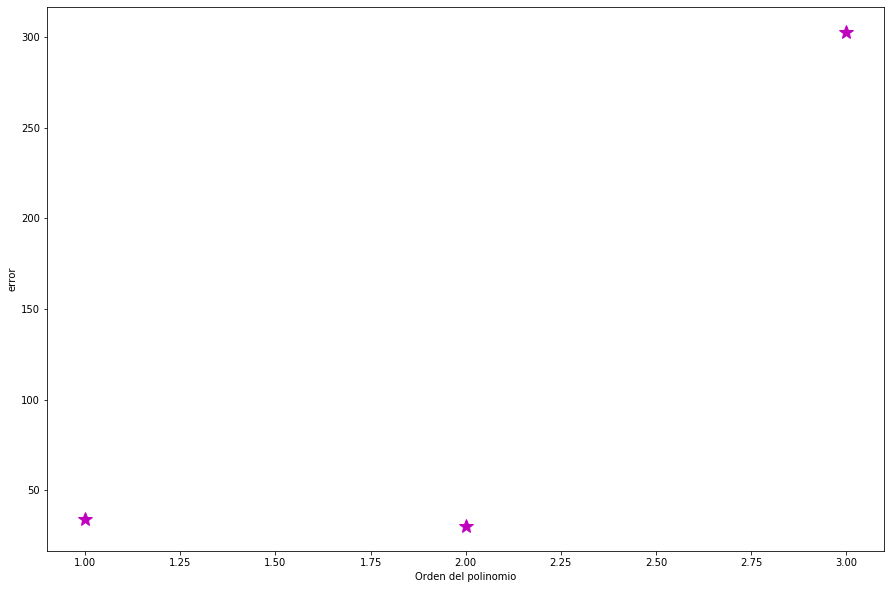

In [13]:
#graficamos los errores cuadráticos
e = [sol1.fun, sol2.fun, sol3.fun]
plt.figure(figsize=(15,10))
plt.plot(range(1,4), e, 'm*', ms=15)
plt.xlabel('Orden del polinomio')
plt.ylabel('error')

In [14]:
yhat1[261],yhat2[261],yhat3[261],data.iloc[261,2]

(19.166009645124593, 18.885342025796817, 16.334859834508833, 20.812201)

### <font color=green>A pesar de que en general el modelo que mejor se ajusta a los datos es el polinomio de grado 2, para el 10 de marzo del 2020 espeficicamente, se ajusta mejor el polinomio de grado 1.

### <font color=blue> Ya que observamos que los datos son muy dificiles de expresar con un polinomio ya que no son estacionarios (cosa que pasa muy constantemente en el mundo finanziero) probamos hacer los datos estacionarios con sus diferencias por lo que importamos otro archivo con los mismos datos más una columna llamada diferencias, misma que calculamos en excel.



In [15]:
archivo2 = '2.csv'
data2 = pd.read_csv(archivo2)
data2

,Consecutivo,Date,Adj Close,diferencias
0,1,11/03/2019,19.483200,0.000000
1,2,12/03/2019,19.391300,-0.091900
2,3,13/03/2019,19.330400,-0.060900
3,4,14/03/2019,19.290100,-0.040300
4,5,15/03/2019,19.298599,0.008499
...,...,...,...,...
257,258,04/03/2020,19.431601,0.026600
258,259,05/03/2020,19.517200,0.085599
259,260,06/03/2020,19.814501,0.297301
260,261,09/03/2020,21.057501,1.243000


### <font color=green> Ahora realizamos lo mismo que anteriormente para proponer otros tres modelos pero con las diferencias de los datos. Esta es una estrategia muy utilizada para regresión lineal cuando los datos no son fáciles de trabar con ellos porque no son estacionarios.

In [16]:

x = data2.iloc[:,0]
y = data2.iloc[:,3]

In [17]:
def obj2(beta,x1,y1,n):
    return np.sum((y-beta.dot([x**i for i in range(n+1)]))**2)

In [18]:
beta_1 = np.zeros(2)
solu1 = opt.minimize(obj2,beta_1,args=(x,y,1))
beta_2 = np.zeros(3)
solu2 = opt.minimize(obj2,beta_2,args=(x,y,2))
beta_3 = np.zeros(4)
solu3 = opt.minimize(obj2,beta_3,args=(x,y,3))
beta_4 = np.zeros(5)

In [19]:
solu1

      fun: 4.642307603506217
 hess_inv: array([[ 7.79293026e-03, -4.44349234e-05],
       [-4.44349234e-05,  3.36373381e-07]])
      jac: array([5.96046448e-08, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([-0.01625612,  0.0001636 ])

In [27]:
solu2

      fun: 4.604262207368446
 hess_inv: array([[ 1.75696817e-02, -2.66514920e-04,  8.44286877e-07],
       [-2.66514920e-04,  5.38094530e-06, -1.91780708e-08],
       [ 8.44286877e-07, -1.91780708e-08,  7.29097346e-11]])
      jac: array([ 0.04400092, -0.00053251,  0.00660795])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 437
      nit: 3
     njev: 85
   status: 2
  success: False
        x: array([ 8.81073159e-03, -3.99959822e-04,  2.13507489e-06])

In [28]:
solu3

      fun: 4.6895659624079995
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([-2.78500009e+00, -8.54270314e+02, -2.21230161e+05,  1.22518558e+08])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 594
      nit: 0
     njev: 97
   status: 2
  success: False
        x: array([0., 0., 0., 0.])

### <font color=blue> Podemos observar que evidentemente el error cuadrático disminuyó considerablemente por lo cual el optar por las diferencias fue una buena idea y el polinomio que mejor se ajusta es de nuevo el de grado $2$ con un error cuadrático de $4.604262$

In [20]:
x_pp = x
y_pp = y

yhatt1 = (solu1.x[0] + solu1.x[1]*x_pp)
yhatt2 = (solu2.x[0] + solu2.x[1]*x_pp + solu2.x[2]*(x_pp**2))
yhatt3 = (solu3.x[0] + solu3.x[1]*x_pp + solu3.x[2]*(x_pp**2) + solu3.x[3]*(x_pp**3))

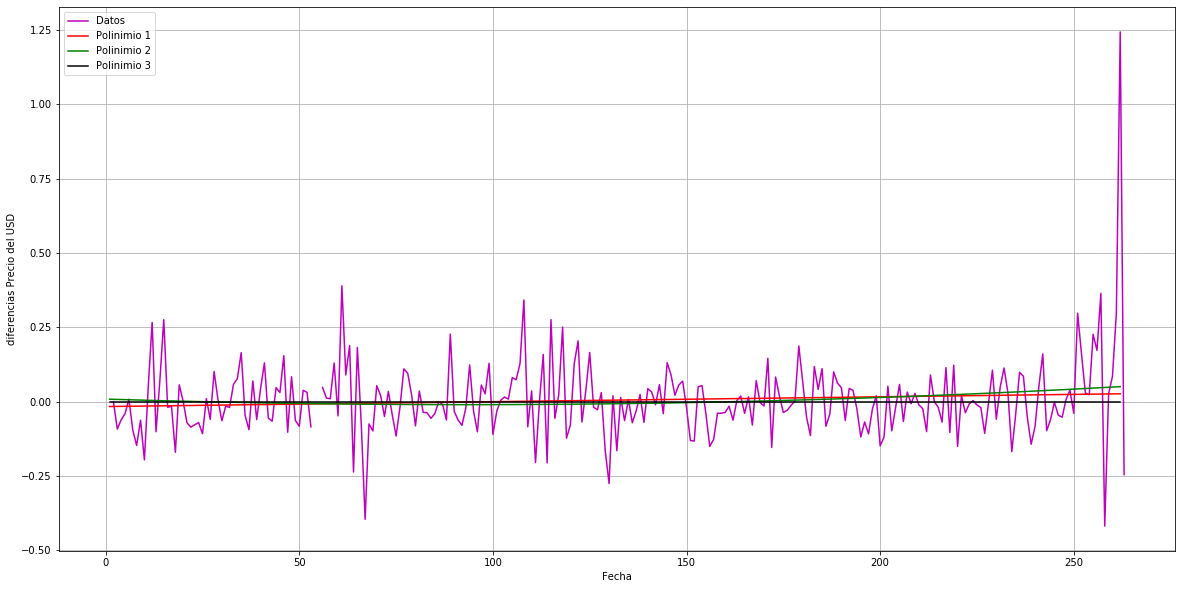

In [21]:
#graficamos estos modelos
plt.figure(figsize=(20,10))
plt.plot(x_pp+1, y_pp,'m',ms=30, label='Datos')
plt.plot(x_pp,yhatt1,'r',ms=5,label='Polinimio 1')
plt.plot(x_pp,yhatt2,'g',ms=5,label='Polinimio 2')
plt.plot(x_pp,yhatt3,'k',ms=5,label='Polinimio 3')

plt.grid()
plt.xlabel('Fecha')
plt.ylabel('diferencias Precio del USD')
plt.legend(loc='best')

### <font color=red>Conclusión:

### <font color=green> Podemos deducir que para datos históricos financieros como es el precio del cierre del dólar un polinomio no es suficiente, se tendrían que hacer modelos más avanzados ya que a pesar de encontrar uno con un error de poco más de 4, como los datos son estacionarios usando las diferencias en este caso parece una especie de ruido blanco o que al menos se comporta como tal ya que los modelos oscilan en el 0 por lo que tiene cierto grado de aleatoriedad y no sólo depende de datos anteriores como una simple regresión lineal.

### <font color=red>referencia:

Yahoo finance. (2020). USD/MXN. Recuperado el día 10 de marzo de 2020, de: https://finance.yahoo.com/quote/MXN=X/